## Create academic performance dataset of students and perform data pre-processing using techniques of data cleaning and data transformation.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('student.csv')
df.head()

,student_id,age,gender,test_scores,study_hours
0,1,18.0,M,85.0,6
1,2,20.0,F,78.0,5
2,3,19.0,F,92.0,7
3,4,22.0,M,80.0,5
4,5,21.0,M,75.0,4


In [4]:
df.shape

(15, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   15 non-null     int64  
 1   age          14 non-null     float64
 2   gender       15 non-null     object 
 3   test_scores  14 non-null     float64
 4   study_hours  15 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 732.0+ bytes


In [9]:
df.describe()

,student_id,age,test_scores,study_hours
count,15.000000,14.000000,14.000000,15.000000
mean,8.000000,20.571429,85.357143,5.666667
std,4.472136,1.696797,6.307592,1.046536
min,1.000000,18.000000,75.000000,4.000000
25%,4.500000,19.250000,80.250000,5.000000
50%,8.000000,20.000000,86.000000,6.000000
75%,11.500000,21.750000,89.750000,6.500000
max,15.000000,24.000000,95.000000,7.000000


In [10]:
df.isnull().sum()

student_id     0
age            1
gender         0
test_scores    1
study_hours    0
dtype: int64

In [18]:
df['age'].fillna(df['age'].median(), inplace=True)

C:\Users\akshi\AppData\Local\Temp\ipykernel_5160\1654433547.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [19]:
df['test_scores'].fillna(df['test_scores'].median(), inplace=True)

C:\Users\akshi\AppData\Local\Temp\ipykernel_5160\2473454704.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['test_scores'].fillna(df['test_scores'].median(), inplace=True)


In [20]:
df.isnull().sum()

student_id     0
age            0
gender         0
test_scores    0
study_hours    0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [22]:
df['gender'] = labelencoder.fit_transform(df['gender'])

In [23]:
df.head()

,student_id,age,gender,test_scores,study_hours
0,1,18.0,1,85.0,6
1,2,20.0,0,78.0,5
2,3,19.0,0,92.0,7
3,4,22.0,1,80.0,5
4,5,21.0,1,75.0,4


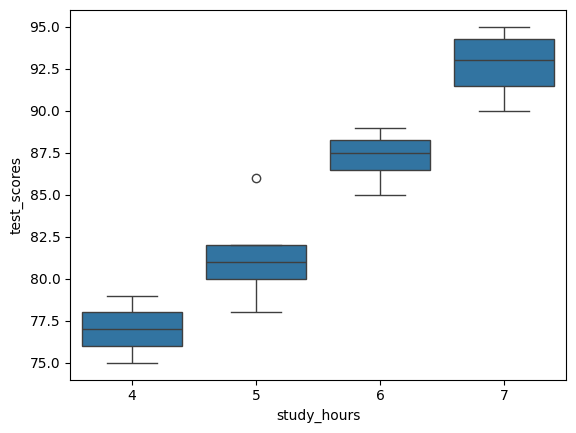

In [25]:
sns.boxplot(data=df, x='study_hours', y='test_scores');

In [26]:
sorted_test_score = np.sort(df['test_scores'])
sorted_test_score

array([75., 78., 79., 80., 81., 82., 85., 86., 87., 88., 89., 90., 92.,
       94., 95.])

In [27]:
mean = np.mean(sorted_test_score)
std = np.std(sorted_test_score)

In [29]:
outliers = []
for x in sorted_test_score:
    z = (x-mean)/std
    if z > 1.5 or z < - 1.5:
        outliers.append(x)
outliers

[75.0, 95.0]

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
ss = StandardScaler()

In [32]:
standard_df = ss.fit_transform(df)

In [33]:
standard_df

array([[-1.62018517, -1.59725914,  0.93541435, -0.06809394,  0.32969024],
       [-1.38873015, -0.33626508, -1.06904497, -1.25973796, -0.65938047],
       [-1.15727512, -0.96676211, -1.06904497,  1.12355007,  1.31876095],
       [-0.9258201 ,  0.92472897,  0.93541435, -0.91926824, -0.65938047],
       [-0.69436507,  0.29423195,  0.93541435, -1.77044253, -1.64845118],
       [-0.46291005, -0.33626508, -1.06904497,  0.10214092, -0.65938047],
       [-0.23145502,  1.555226  ,  0.93541435,  0.44261063,  0.32969024],
       [ 0.        , -0.96676211, -1.06904497,  1.63425465,  1.31876095],
       [ 0.23145502,  0.29423195,  0.93541435, -1.0895031 , -1.64845118],
       [ 0.46291005, -0.33626508,  0.93541435, -0.74903338, -0.65938047],
       [ 0.69436507,  0.92472897, -1.06904497,  0.78308035,  1.31876095],
       [ 0.9258201 , -0.33626508, -1.06904497,  0.27237577,  0.32969024],
       [ 1.15727512,  2.18572303,  0.93541435, -0.57879852, -0.65938047],
       [ 1.38873015, -0.33626508,  0.9